In [2]:
import sklearn as sl
from numpy import *
import jupyter as jp
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import model_selection as ms

In [3]:
def Loss_MSE(X,W,y): #平均误差
    m=X.shape[0]
    a=transpose(dot(X,W)-y)
    b=dot(X,W)-y
    return dot(a,b)/(2*m)

def load_data(): #加载数据
    dataset = ds.load_svmlight_file("dataset\\housing_scale.txt")
    return dataset[0],dataset[1]

X,y=load_data()
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.3,random_state=0)

X_train=X_train.toarray()
X_test=X_test.toarray()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

col_train=ones(X_train.shape[0])
col_test=ones(X_test.shape[0])

X_train=c_[col_train,X_train]
X_test=c_[col_test,X_test]

init_W=zeros(X_train.shape[1]).reshape(-1,1) #全0初始化


def gradient(X,W,y):
    y_est=dot(X,W)
    m=X.shape[0]
    n = X.shape[1]
    result = zeros([n, 1]) #梯度向量

    for i in range(n):
        result[i, 0] = float(dot((y_est - y).T, X[:, i]) )/m

    return result

def gradient_descent(X_train,y_train,X_test,y_test,W,alpha=0.2,loop_num=7): #梯度下降
    m = X.shape[0]
    n = X.shape[1]

    loss_train=[]
    loss_test=[]

    for i in range(loop_num):
        gradi=gradient(X_train,W,y_train)
        W=W-alpha*gradi
        loss_train.append(float(Loss_MSE(X_train,W,y_train)))
        loss_test.append(float(Loss_MSE(X_test,W,y_test)))

    return W,loss_train,loss_test

In [4]:
X,y=load_data()
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.3,random_state=0)

X_train=X_train.toarray()
X_test=X_test.toarray()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

col_train=ones(X_train.shape[0])
col_test=ones(X_test.shape[0])

X_train=c_[col_train,X_train]
X_test=c_[col_test,X_test]

init_W=zeros(X_train.shape[1]).reshape(-1,1) #全0初始化W,loss_train,loss_test = gradient_descent(X_train,y_train,X_test,y_test,init_W,loop_num=6)

In [5]:
W,loss_train,loss_test = gradient_descent(X_train,y_train,X_test,y_test,init_W,loop_num=100) #训练100次

Text(0.5, 1.0, 'The graph of absolute diff value varing with the number of iterations')

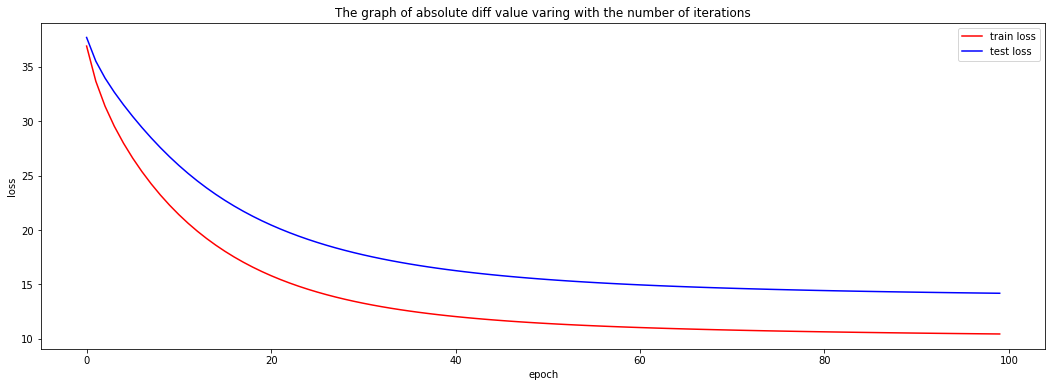

In [6]:
%matplotlib inline

plt.figure(figsize=(18, 6))
plt.plot(loss_train, "-", color="r", label="train loss")
plt.plot(loss_test, "-", color="b", label="test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")